# EDA

In this notebook you will find more analysis for the data set

### Una vez limpiado los datos, hay diferentes formas de llevar a cabo el análisis de las columnas de texto, especialmente las que contienen diagnósticos:

1. **Análisis de frecuencia de palabras**: Una forma sencilla de empezar es simplemente contar la frecuencia de cada diagnóstico único. Esto puede ayudar a identificar los diagnósticos más comunes.

2. **Nube de palabras**: Una nube de palabras visualiza las palabras más frecuentes en tu texto, donde el tamaño de cada palabra es proporcional a su frecuencia.

3. **Análisis de sentimientos**: Aunque es más común en el análisis de comentarios o reseñas de productos, el análisis de sentimientos podría ser útil si los diagnósticos o los motivos de ingreso contienen cualquier tipo de subjetividad.

4. **Análisis de temas con LDA (Latent Dirichlet Allocation)**: Esta es una forma de modelado de temas que puede ayudar a identificar los temas subyacentes en los diagnósticos.

5. **Agrupación de texto (clustering)**: Utilizando técnicas como K-means, se puede agrupar diagnósticos similares juntos. Esto puede ser especialmente útil si existe un gran número de diagnósticos únicos.

6. **Word Embeddings (incrustaciones de palabras)**: Herramientas como Word2Vec o GloVe pueden ayudar a convertir los diagnósticos en vectores numéricos para realizar análisis más avanzados.

Para empezar con alguno de estos, se necesita una forma de convertir los diagnósticos de texto en un formato que los algoritmos puedan entender. Algunas técnicas comunes:

1. **Bolsa de palabras (Bag of Words)**: Esta es la forma más sencilla de convertir texto en números. Simplemente cuenta la cantidad de veces que cada palabra aparece.

2. **TF-IDF**: Similar a la Bolsa de Palabras, pero además de contar las frecuencias de las palabras, también toma en cuenta la frecuencia de las palabras en todo el corpus del documento. Esto ayuda a reducir la importancia de las palabras que aparecen con frecuencia, como "el", "un", etc.

3. **Tokenización**: Esto implica dividir el texto en palabras individuales (o tokens). Esto puede ser útil para eliminar las palabras comunes (también conocidas como stopwords), así como para el análisis de la frecuencia de las palabras.

4. **One-hot encoding**: Esta es otra forma de convertir texto en números al crear una matriz de variables binarias para cada palabra única.

La técnica a utilizar dependerá del problema específico que se esté intentando resolver, así como de la naturaleza de los datos.

In [22]:
# Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [24]:
%load_ext kedro.ipython

[09/07/23 01:12:28] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/07/23 01:12:29] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[09/07/23 01:12:30] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [25]:
catalog.list('hado')

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'strip_lower_hado_17',
 'strip_lower_hado_18',
 'strip_lower_hado_19',
 'strip_lower_hado_20',
 'strip_lower_hado_21',
 'strip_lower_hado_22',
 'hado_concat',
 'hado_clean',
 'hado_clean_na',
 'hado_replaced_words',
 'hado_cleaned',
 'hado_cleaned_sedation',
 'hado_cleaned_medication',
 'hado_categorized',
 'hado_final',
 'hado_encoded']

In [26]:
df = catalog.load('hado_final')

[09/07/23 01:12:48] INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

In [27]:
df.head()

,h_procedencia,hospital_category,s_procedencia,procedencia_category,diagnostico,diagnosis_category,motivo_ing,ingreso_category,motivo_alta,alta_category,...,categorized_combined_otros,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina,medico,ayuntamiento,year
0,gil casares,Santiago,upal,Otros,cancer orl,Canceres y neoplasias,control sintomas,Sintomas,reingreso,Complicaciones,...,Otros,0,0,0,0,0,0,valdes,desconocido,2017
1,clinico,Santiago,oncologia,Oncologia,melanoma vulvar,Neurologicas,mal control dolor,Sintomas,exitus,Exitus,...,Otros,0,0,0,0,0,0,galego feal,desconocido,2017
2,clinico,Santiago,mir,MIR,cancer broncogenico,Canceres y neoplasias,control evolutivo,Evaluaciones,fin cuidados,Otros,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017
3,clinico,Santiago,digestivo,Otros,cirrosis hepatica,Hepaticas y pancreaticas,administracion octreotido,Otros,fin cuidados,Otros,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017
4,clinico,Santiago,urgencias,Urgencias,neplasia de mama estadio IV,Otros,control sintomas,Sintomas,exitus,Exitus,...,Desconocido/No especificado,0,0,0,0,0,0,lopez renedo,desconocido,2017


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   h_procedencia               4013 non-null   object
 1   hospital_category           4013 non-null   object
 2   s_procedencia               4013 non-null   object
 3   procedencia_category        4013 non-null   object
 4   diagnostico                 4013 non-null   object
 5   diagnosis_category          4013 non-null   object
 6   motivo_ing                  4013 non-null   object
 7   ingreso_category            4013 non-null   object
 8   motivo_alta                 4013 non-null   object
 9   alta_category               4013 non-null   object
 10  fecha_alta                  4013 non-null   object
 11  ap                          4013 non-null   object
 12  n_estancias                 4013 non-null   int64 
 13  n_visitas                   4013 non-null   int6

# 1. Análisis de frecuencia

In [29]:
diagnostic_counts = df['diagnostico'].value_counts()

In [30]:
diagnostic_counts.sort_values(ascending=False)

ITU (infeccion del tracto urinario)    172
infeccion respiratoria                 145
infeccion urinaria                     112
insuficiencia cardiaca                  73
cancer de colon                         70
                                      ... 
amputacion miembro inferior              1
hidrosadenitis                           1
laparotomia                              1
paralisis cerebral infantil              1
neoplasia pulmon                         1
Name: diagnostico, Length: 1519, dtype: int64

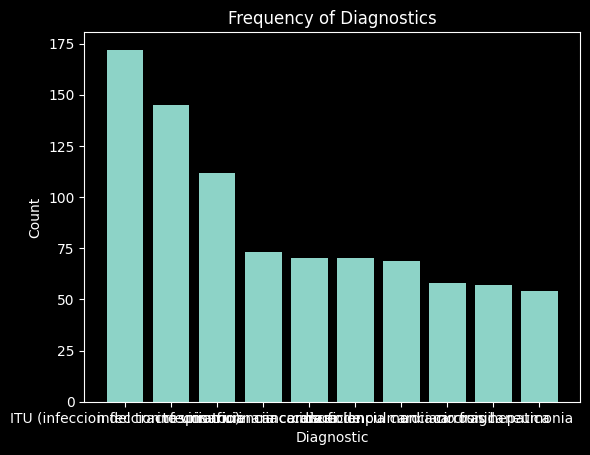

In [113]:
# Create a frecuency plot for diagnostic_counts?
# Create the frequency plot
plt.bar(diagnostic_counts.head(10).index, diagnostic_counts.head(10).values)
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.title('Frequency of Diagnostics')
plt.show()

# 2. Análisis de correlación

In [31]:
# Para correlaciones con variables numéricas puedes usar algo como esto:
df.groupby('diagnostico')['n_visitas'].mean()

diagnostico
ITU (infeccion del tracto urinario)                                     4.168605
ITU (infeccion del tracto urinario) (infeccion del tracto urinario)     1.000000
ITU (infeccion del tracto urinario) acv                                 0.000000
ITU (infeccion del tracto urinario) agitacion                           1.000000
ITU (infeccion del tracto urinario) anciano fragil                      7.000000
                                                                         ...    
valoracion ulceras                                                      1.000000
ventilacion mecanica invasiva                                          35.000000
vmi por insuficiencia respiratoria                                     18.000000
vomitos y diarrea cancer colon estadio IV                               2.000000
vomitosneo recto estadio IV                                             7.000000
Name: n_visitas, Length: 1519, dtype: float64

In [32]:
round(df.groupby('diagnostico')['n_estancias'].mean().sort_values(ascending=False),2)

diagnostico
ulceras de mal conmtrol en eeii       304.0
upps esclerosis multiple epilepsia    204.0
niemanpick                            180.0
pseudoartrosis de tibia               171.0
ulcera vascular eeii izquierda        150.0
                                      ...  
neoplasia pulmonar cirrosis             1.0
caepidermoide labio                     1.0
sde mielodisplasicolma                  0.0
adenoca de pulmon estadio IV            0.0
cancer mamam estadioiv                  0.0
Name: n_estancias, Length: 1519, dtype: float64

In [48]:
# Para correlaciones con variables categóricas podrías usar tablas de contingencia
pd.crosstab(df['diagnostico'], df['tiene_sedacion'])

tiene_sedacion,0,1
diagnostico,,
ITU (infeccion del tracto urinario),163,9
ITU (infeccion del tracto urinario) (infeccion del tracto urinario),1,0
ITU (infeccion del tracto urinario) acv,2,0
ITU (infeccion del tracto urinario) agitacion,1,0
ITU (infeccion del tracto urinario) anciano fragil,1,0
...,...,...
valoracion ulceras,1,0
ventilacion mecanica invasiva,1,0
vmi por insuficiencia respiratoria,1,0


In [51]:
pd.crosstab(df['diagnostico'], df['tiene_sedacion']).sum().sort_values(ascending=False)
# 0 = no 1=si

tiene_sedacion
0    3320
1     693
dtype: int64

In [52]:
pd.crosstab(df['diagnostico'], df['diagnosis_category']).sum().sort_values(ascending=False)

diagnosis_category
Otros                            961
Canceres y neoplasias            790
Infecciones                      533
Pulmonares y respiratorias       438
Hepaticas y pancreaticas         282
Neurologicas                     258
Cardiacas                        244
Renales y urinarias              212
Musculoesqueléticas y de piel    183
Hematologicas                    112
dtype: int64

In [53]:
df['diagnosis_category'].value_counts()

Otros                            961
Canceres y neoplasias            790
Infecciones                      533
Pulmonares y respiratorias       438
Hepaticas y pancreaticas         282
Neurologicas                     258
Cardiacas                        244
Renales y urinarias              212
Musculoesqueléticas y de piel    183
Hematologicas                    112
Name: diagnosis_category, dtype: int64

In [54]:
df.describe()

,n_estancias,n_visitas,ps_ecog,barthel,gds_fast,eva_ing,tiene_sedacion,morfina,midazolam,buscapina,haloperidol,levomepromazina,year
count,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000,4013.000000
mean,14.981560,6.008472,16.589833,335.279841,7.840269,2.365064,0.172689,0.018191,0.017443,0.017194,0.002741,0.001744,2019.904062
std,19.471153,6.959248,26.598380,583.607228,18.992604,12.684001,0.378025,0.133658,0.130932,0.130010,0.052290,0.041734,1.786321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
25%,4.000000,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
50%,9.000000,4.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
75%,18.000000,7.000000,34.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000
max,304.000000,99.000000,1000.000000,5060.000000,70.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000


In [55]:
[len(x) for x in df]

[13,
 17,
 13,
 20,
 11,
 18,
 10,
 16,
 11,
 13,
 10,
 2,
 11,
 9,
 17,
 20,
 6,
 6,
 5,
 8,
 8,
 10,
 6,
 9,
 12,
 17,
 11,
 12,
 13,
 14,
 5,
 7,
 7,
 8,
 7,
 20,
 5,
 7,
 7,
 14,
 26,
 14,
 7,
 9,
 9,
 11,
 15,
 6,
 12,
 4]

# 3. Análisis temporal

In [56]:
#df.groupby(['year', 'diagnostico']).size().unstack().plot(kind='line', subplots=True)

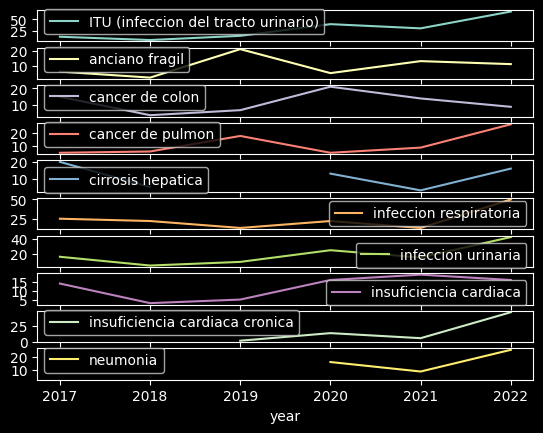

In [57]:
top_diagnoses = df['diagnostico'].value_counts().index[:10]  # top N diagnoses
df_top_diagnoses = df[df['diagnostico'].isin(top_diagnoses)]

df_top_diagnoses.groupby(['year', 'diagnostico']).size().unstack().plot(kind='line', subplots=True);

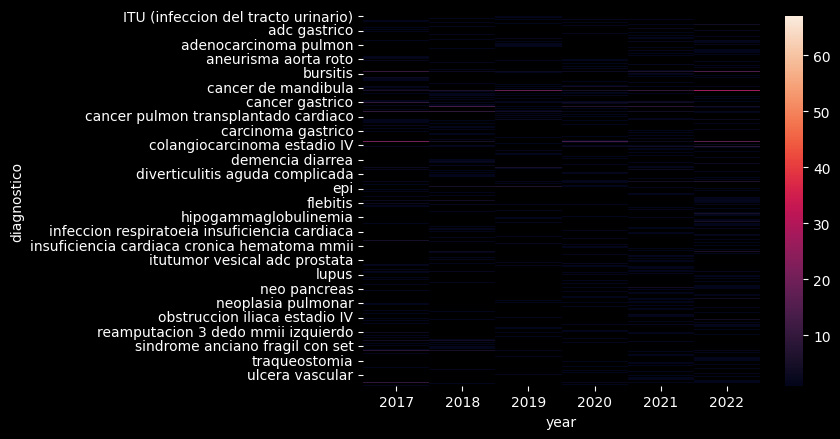

In [58]:
import seaborn as sns

diagnosis_counts = df.groupby(['diagnostico', 'year']).size().unstack()
sns.heatmap(diagnosis_counts);

<Axes: xlabel='diagnostico', ylabel='year'>

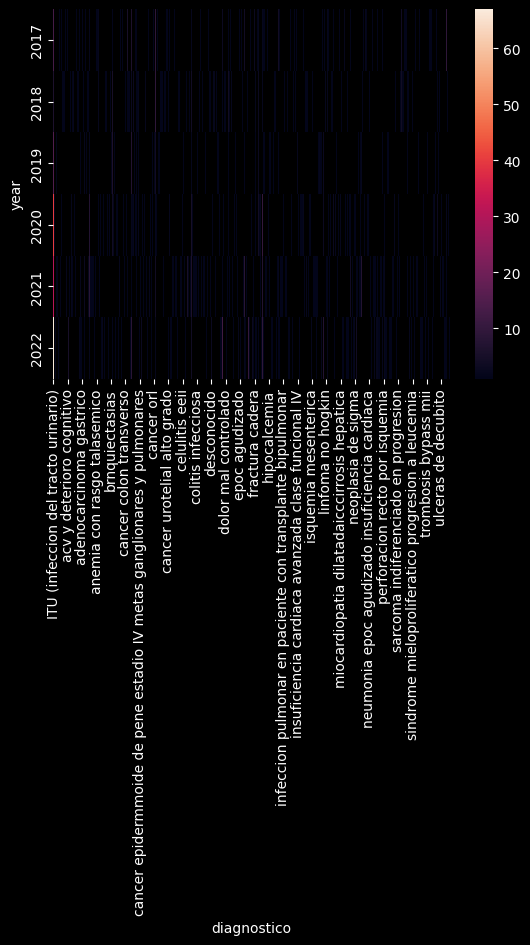

In [59]:
diagnosis_counts = df.groupby(['year', 'diagnostico']).size().unstack()
sns.heatmap(diagnosis_counts)

# 4. Análisis de texto

Dado que tienes un conjunto de diagnósticos en texto libre, puedes usar técnicas de procesamiento de lenguaje natural (NLP) para analizarlos. Algunas posibles técnicas que podrías considerar incluyen:

1. Extracción de Entidades: Esta técnica se refiere a la identificación de términos o frases específicas en el texto que corresponden a ciertas categorías, como enfermedades o condiciones médicas. Podrías intentar extraer términos médicos comunes de tus diagnósticos y luego usarlos para el análisis.

2. Tokenización y conteo de palabras: Puedes dividir cada diagnóstico en palabras individuales (tokens), y luego contar cuántas veces aparece cada palabra. Esto puede darte una idea de los términos más comunes en tus diagnósticos.

````python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
````

3. Análisis de Sentimientos: Aunque esto se usa más comúnmente con texto que expresa opiniones o emociones, podrías usar el análisis de sentimientos para identificar diagnósticos que indican condiciones especialmente graves o menos graves.

4. Agrupación de texto (clustering): Podrías usar técnicas de agrupación como K-means para agrupar diagnósticos similares. Antes de hacer esto, necesitarás convertir tus diagnósticos en un formato numérico usando algo como TF-IDF.

````python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
````

5. Identificación de Temas (Topic Modeling): Podrías usar técnicas de identificación de temas como LDA (Latent Dirichlet Allocation) para identificar los "temas" comunes en tus diagnósticos.


````python
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(X)
````


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

# Reemplazar valores nulos con una cadena vacía
df['diagnostico'] = df['diagnostico'].fillna('')

# Ahora puedes aplicar CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['diagnostico'])
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [67]:
# Palabras más comunes:

# Sumar las ocurrencias de cada palabra
sum_words = word_counts.sum(axis=0)

# Ordenar las palabras según su frecuencia total
sorted_words = sum_words.sort_values(ascending=False)

# Mostrar las 10 palabras más comunes
print(sorted_words.head(20))

cancer           806
infeccion        609
de               547
iv               400
estadio          386
insuficiencia    243
del              222
pulmon           221
tracto           221
urinario         221
itu              219
respiratoria     205
cardiaca         204
colon            199
urinaria         147
cronica          144
neoplasia        130
fragil           130
demencia         107
pancreas         102
dtype: int64


# 5. Análisis predictivo

# 6. Evaluación de los síntomas: 
¿Cuáles son los síntomas más comunes reportados? ¿Cómo varían estos en función del diagnóstico?

### Primero, analicemos los síntomas más comunes reportados:

In [68]:
# Calcular la frecuencia de cada síntoma
sintomas_freq = df['motivo_ing'].value_counts()

# Mostrar los 10 síntomas más comunes
print(sintomas_freq.head(10))

control sintomas              1229
tratamiento antibiotico IV     388
antibioterapia IV              345
valoracion                     128
control evolutivo              106
continuacion de cuidados       102
cuidados paliativos             85
curas                           78
tratamiento                     73
seguimiento                     70
Name: motivo_ing, dtype: int64


### Como varían estos sínotmas en función del tratamiento

In [69]:
# Agrupar por diagnóstico y contar la frecuencia de los síntomas dentro de cada grupo
sintomas_por_diagnostico = df.groupby('diagnostico')['motivo_ing'].value_counts()

# Mostrar los síntomas más comunes para cada diagnóstico
print(sintomas_por_diagnostico)

diagnostico                                motivo_ing                                
ITU (infeccion del tracto urinario)        tratamiento antibiotico IV                    72
                                           antibioterapia IV                             45
                                           tratamiento                                    6
                                           tratamiento antibiotico                        6
                                           antibioterapia intravenosa                     4
                                                                                         ..
valoracion ulceras                         curas                                          1
ventilacion mecanica invasiva              control evolutivo                              1
vmi por insuficiencia respiratoria         control en domicilio portador vmi nocturna     1
vomitos y diarrea cancer colon estadio IV  control sintomas                           

In [71]:
diag_categ_por_ingres_categ = df.groupby('diagnosis_category')['ingreso_category'].value_counts()
print(diag_categ_por_ingres_categ)

diagnosis_category             ingreso_category
Canceres y neoplasias          Sintomas            553
                               Otros               127
                               Evaluaciones         60
                               Tratamientos         50
Cardiacas                      Tratamientos         74
                               Otros                72
                               Sintomas             52
                               Evaluaciones         46
Hematologicas                  Otros                73
                               Sintomas             27
                               Evaluaciones          9
                               Tratamientos          3
Hepaticas y pancreaticas       Sintomas            139
                               Otros                80
                               Tratamientos         42
                               Evaluaciones         21
Infecciones                    Tratamientos        433
                 

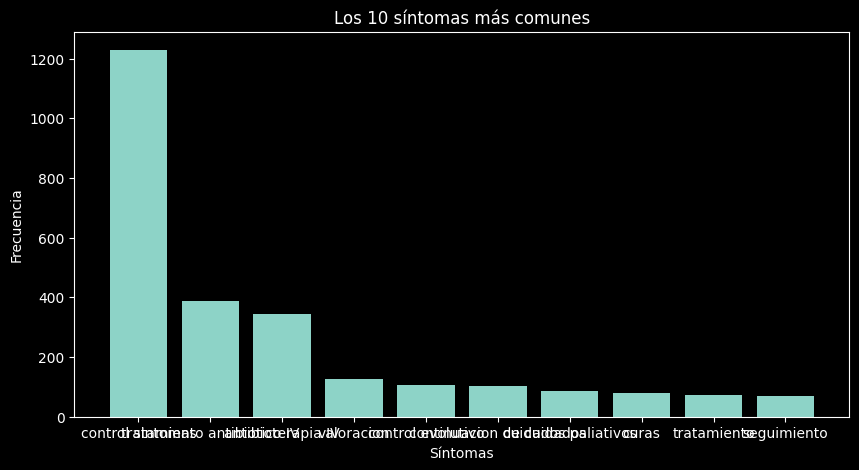

In [73]:
import matplotlib.pyplot as plt

# Obtener los 10 síntomas más comunes y sus frecuencias
top_sintomas = sintomas_freq.head(10)

# Crear una gráfica de barras
plt.figure(figsize=(10, 5))
plt.bar(top_sintomas.index, top_sintomas.values)

# Añadir títulos y etiquetas
plt.title('Los 10 síntomas más comunes')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()


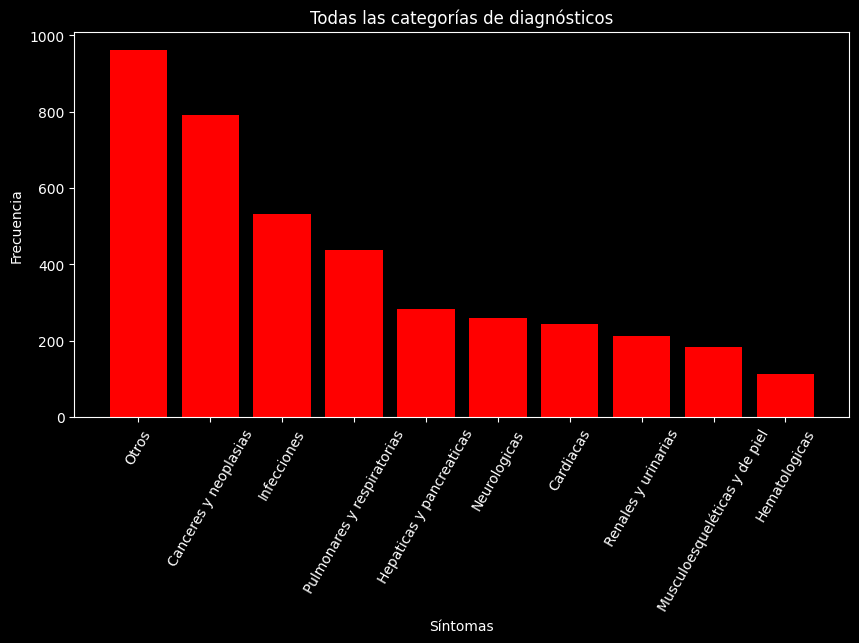

In [103]:
top_categ = df['diagnosis_category'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(top_categ.index, top_categ.values, color='red')

# Añadir títulos y etiquetas
plt.title('Todas las categorías de diagnósticos')
plt.xlabel('Síntomas')
plt.ylabel('Frecuencia')

ax.tick_params (axis='x', rotation=60)
# Mostrar la gráfica
plt.show()